In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [27]:

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [29]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.039579,-1.847798,-0.597408,0.293231,0.426339,1
1,1.434193,1.067516,0.295219,0.044318,-0.719653,0
2,0.035210,-1.528408,-0.708925,0.589083,1.115736,1
3,0.181848,-0.106277,0.186472,-1.095548,0.073502,1
4,0.430792,-0.644996,1.606555,-0.862738,-1.537496,1


In [31]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [33]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [35]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [37]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16692\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [39]:
df2 = combined_sampling(df,0.5,0.5)
     

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16692\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [41]:

df3 = combined_sampling(df,0.5,0.5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16692\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [43]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
     

Index(['col4', 'col1', 'target'], dtype='object')
Index(['col2', 'col1', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [47]:
df3.head()

,col1,col5,target
69,-0.216565,0.926254,0
76,1.813994,0.741684,1
41,2.943472,-1.416010,0
21,1.545447,0.400516,1
49,0.305725,0.238204,1


In [49]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [51]:

clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])
     

DecisionTreeClassifier()

In [53]:

from sklearn.tree import plot_tree

[Text(0.4166666666666667, 0.9615384615384616, 'x[1] <= -0.341\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.3333333333333333, 0.8846153846153846, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.375, 0.9230769230769231, 'True  '),
 Text(0.5, 0.8846153846153846, 'x[0] <= -2.611\ngini = 0.495\nsamples = 42\nvalue = [19.0, 23.0]'),
 Text(0.45833333333333337, 0.9230769230769231, '  False'),
 Text(0.4166666666666667, 0.8076923076923077, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5833333333333334, 0.8076923076923077, 'x[1] <= 2.37\ngini = 0.478\nsamples = 38\nvalue = [15, 23]'),
 Text(0.5, 0.7307692307692307, 'x[0] <= 0.952\ngini = 0.438\nsamples = 34\nvalue = [11, 23]'),
 Text(0.4166666666666667, 0.6538461538461539, 'x[1] <= 0.942\ngini = 0.422\nsamples = 33\nvalue = [10, 23]'),
 Text(0.25, 0.5769230769230769, 'x[1] <= 0.344\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -0.179\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(

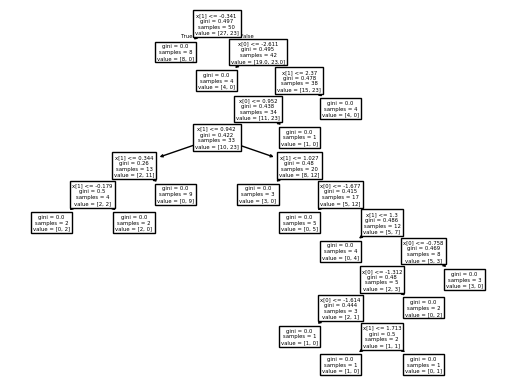

In [55]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'x[0] <= 0.142\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.4, 0.5, 'x[1] <= 2.647\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

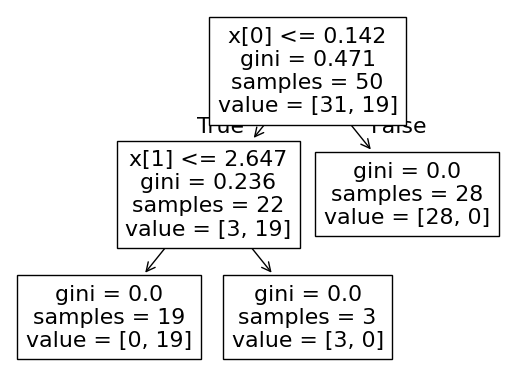

In [57]:

plot_tree(clf2)

[Text(0.5, 0.9166666666666666, 'x[0] <= -0.023\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.45, 0.8333333333333333, 'True  '),
 Text(0.6, 0.75, 'x[0] <= 2.211\ngini = 0.491\nsamples = 37\nvalue = [16, 21]'),
 Text(0.55, 0.8333333333333333, '  False'),
 Text(0.5, 0.5833333333333334, 'x[1] <= -1.016\ngini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= -1.7\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.25, 'x[0] <= 0.68\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.4166666666666667, 'x[0] <= 1.553\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.8, 0.25, 'x[0] <= 1.596\ngini 

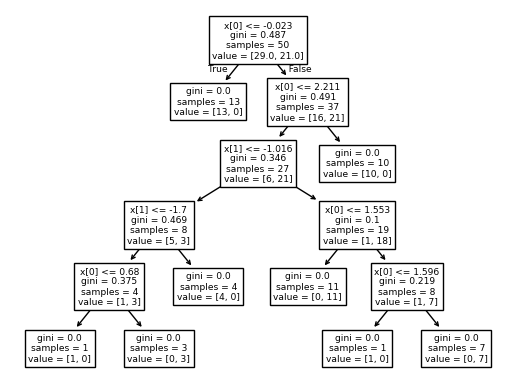

In [59]:
plot_tree(clf3)

In [61]:

clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [63]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))
     

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [65]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [67]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
30,1.483918,-1.067763,-0.068478,-0.902429,0.043013,1
46,1.635124,-3.390784,0.721020,1.111005,-0.340226,1
82,1.349559,0.507740,1.114808,0.529726,-1.063481,0
78,-0.042951,0.965381,1.891894,-2.190566,-1.311294,0
21,1.545447,-2.516201,0.385944,0.702838,0.400516,1
11,0.869894,-0.352135,1.630299,-2.565654,-2.247825,1
80,-0.833936,1.297095,2.391303,2.413726,-1.333861,0
65,2.099065,-0.837548,1.185200,-4.447933,-0.887498,1
63,3.504009,-0.475457,0.863254,-1.971600,-0.990565,0
55,1.606021,-1.294573,1.663725,-1.567398,-1.873618,1
